## Gibbs sampler
We're going to try out Gibbs sampling on the hypercube. The simplest possible case surely?

ie. there are $N$ variables, and they're all binary, so there are $2^N$ states, which are the vertices of a hypercube in $N$ dimensions.

We'll specify some probability $P(\mathbf{x})$ for each pattern (= binary string) $\mathbf{x}$.

Then we'll run heaps of Gibbs Sampler updates from some initial state, and count how often the sampler visits each state.

If we're right, these counts should come to match our target distribution: bingo!

In [23]:
%reset -f
%matplotlib inline
import matplotlib as mpl
import numpy as np
from numpy import array as a
import matplotlib.pyplot as plt
import numpy.random as rng
from scipy.special import expit as sigmoid
np.set_printoptions(precision = 2, suppress = True)
import time
rng.seed(int(time.time())) # seed the random number generator

In [33]:
# make up an array with each row being one of the binary patterns. Do 'em all.
N = 3
inpats = np.array([[0 if (i & (1 << bit) == 0) else 1 for bit in range(N)] for i in range(2**N)]) 
print (inpats)

powers = a([2**i for i in range(N)])
input_ids = {tuple(i): np.sum(i * powers) for i in inpats}
print (input_ids)

[[0 0 0]
 [1 0 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]
 [1 0 1]
 [0 1 1]
 [1 1 1]]
{(1, 1, 0): 3, (0, 0, 0): 0, (0, 1, 1): 6, (1, 0, 0): 1, (0, 1, 0): 2, (0, 0, 1): 4, (1, 1, 1): 7, (1, 0, 1): 5}


In [34]:
# Make up some probability distribution over all the inpats
targetProbs = 1 + np.arange(len(inpats))
targetProbs = targetProbs / targetProbs.sum()
print (targetProbs)

[ 0.03  0.06  0.08  0.11  0.14  0.17  0.19  0.22]


## Gibbs goes here

In [35]:
ITERATIONS = 1000 * 2 ** N

id = lambda x: input_ids[tuple(x)]

x = np.zeros(N)
histogram = {i:0 for i in range(2**N)}
for _ in range(ITERATIONS):
    index = rng.randint(N)
    x_prime = np.copy(x)
    x_prime[index] = 1 - x[index]
    
    r = sigmoid(np.log(targetProbs[id(x_prime)]) - np.log(targetProbs[id(x)]))
    if rng.rand() < r:
        x = x_prime
    histogram[id(x)] += 1

empirical = {k:v/ITERATIONS for k,v in histogram.items()}
theoretical = {i : targetProbs[i] for i in range(2**N)}

## Compare samples made by Gibbs with the target distribution

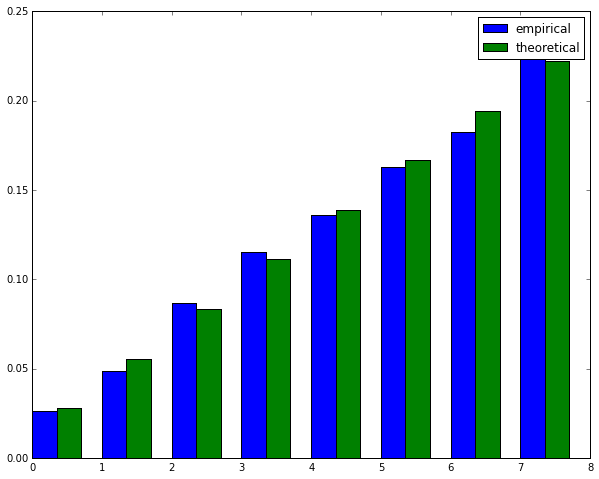

In [36]:
ids = a(range(2**N))
emp = [empirical[i] for i in ids]
theo = [theoretical[i] for i in ids]

width = 0.35
plt.figure(figsize=(10,8))
plt.bar(ids, emp, width, color='b', label='empirical')
plt.bar(ids+width, theo, width, color='g', label='theoretical')
plt.legend()

pass